## Dataset Loading

### Train/Val/Test files

In [ ]:
import os
import csv
import numpy as np
import pandas as pd

In [ ]:
train_df = pd.read_csv("/Users/hiamrob/Downloads/StockEmotions-main/tweet/train_stockemo.csv", encoding="utf-8")
train_df

,id,date,ticker,emo_label,senti_label,original,processed
0,100001,2020-01-01,AMZN,excitement,bullish,$AMZN Dow futures up by 100 points already 🥳,Amazon Dow futures up by 100 points already [...
1,100002,2020-01-01,TSLA,excitement,bullish,$TSLA Daddy's drinkin' eArly tonight! Here's t...,Tesla Daddy's drinkin' eArly tonight! Here's t...
2,100003,2020-01-01,AAPL,confusion,bullish,$AAPL We’ll been riding since last December fr...,Apple We’ll been riding since last December fr...
3,100004,2020-01-01,TSLA,excitement,bullish,"$TSLA happy new year, 2020, everyone🍷🎉🙏","Tesla happy new year, 2020, everyone [wine gla..."
4,100005,2020-01-01,TSLA,excitement,bullish,"$TSLA haha just a collection of greats...""Mars...","Tesla haha just a collection of greats...""Mars..."
...,...,...,...,...,...,...,...
7995,109536,2020-08-06,AAPL,surprise,bullish,BREAKING NEWS: $AAPL beats Elon Musk and Richa...,BREAKING NEWS: Apple beats Elon Musk and Richa...
7996,109541,2020-08-10,AAPL,belief,bullish,$AAPL why be a 2T giant and not dabble a littl...,Apple why be a 2T giant and not dabble a littl...
7997,109561,2020-08-18,AMZN,ambiguous,bullish,"$AMZN - 3,500 jobs = $3,500 ??? 😁","Amazon - 3,500 jobs = $3,500 ??? [beaming fac..."
7998,109795,2020-10-01,TSLA,surprise,bullish,$TSLA $500c 10/2 at 36k volume 👀👀,Tesla $500c 10/2 at 36k volume [eyes]


In [ ]:
val_df = pd.read_csv("/Users/hiamrob/Downloads/StockEmotions-main/tweet/val_stockemo.csv", encoding="utf-8")
val_df

,id,date,ticker,emo_label,senti_label,original,processed
0,100595,2020-02-06,TSLA,anger,bearish,$TSLA did jim Cramer just pull another bear St...,Tesla did jim Cramer just pull another bear St...
1,100693,2020-02-11,FB,anger,bearish,$FB uh oh FTC turning up the heat 💩,Facebook uh oh FTC turning up the heat [pile ...
2,101203,2020-03-04,AAPL,anger,bullish,$AAPL why are they holding it here! WTF! ✌🏽 GL...,Apple why are they holding it here! WTF! [vic...
3,101223,2020-03-05,MSFT,belief,bullish,$MSFT 🍀🍀Target $200.00 long term ☀️☀️☀️☀️☀️,Microsoft [four leaf clover] Target $200.00 ...
4,101349,2020-03-11,AMZN,anger,bullish,$AMZN another RED day... thus is just plain ou...,Amazon another RED day... thus is just plain o...
...,...,...,...,...,...,...,...
995,108995,2020-12-31,TSLA,disgust,bullish,$TSLA What’s twice as good as $420? —————> $840 😎,Tesla What’s twice as good as $420? —————> $84...
996,108996,2020-12-31,FB,anxiety,bearish,$FB We’ll that’s some options fuckery by insti...,Facebook We’ll that’s some options fuckery by ...
997,108997,2020-12-31,TSLA,optimism,bullish,$TSLA the daily looks like a big ✅ check mark!...,Tesla the daily looks like a big [check mark ...
998,108998,2020-12-31,BA,optimism,bullish,"$BA this will pump when you least expect it, r...",Boeing this will pump when you least expect it...


In [ ]:
test_df = pd.read_csv("/Users/hiamrob/Downloads/StockEmotions-main/tweet/test_stockemo.csv", encoding="utf-8")
test_df

,id,date,ticker,emo_label,senti_label,original,processed
0,100067,2020-01-08,AAPL,confusion,bearish,$AAPL with all time highs again the market see...,Apple with all time highs again the market see...
1,100115,2020-01-10,BA,anxiety,bullish,$BA about to explode 🚨\nKeep shorting please,Boeing about to explode [police car light] \n...
2,100175,2020-01-15,SBUX,confusion,bearish,"$SBUX TPO alot of volume at 91.74, thats after...","Starbucks TPO alot of volume at 91.74, thats a..."
3,100234,2020-01-18,TSLA,confusion,bearish,$TSLA down 6$ afterhours right now 🤔,Tesla down 6$ afterhours right now [thinking ...
4,100268,2020-01-22,BA,confusion,bearish,$BA can someone tell me why they haven’t downg...,Boeing can someone tell me why they haven’t do...
...,...,...,...,...,...,...,...
995,109996,2020-12-31,ABNB,optimism,bearish,"$ABNB “sugar daddy puts.” Don’t mind me, I’m j...","Airbnb “sugar daddy puts.” Don’t mind me, I’m ..."
996,109997,2020-12-31,TSLA,disgust,bullish,$TSLA \nGood news... now bears can get help wh...,Tesla \nGood news... now bears can get help wh...
997,109998,2020-12-31,BABA,confusion,bullish,$BABA Who else is glad they sold in 240s yeste...,Alibaba Who else is glad they sold in 240s yes...
998,109999,2020-12-31,CCL,amusement,bullish,$CCL $23 calls for .79 you know what to do 🥳,Carnival $23 calls for .79 you know what to do...


## Preprocessing


### Dataset cleansing

Extracting the unique tickers lists from the training, test and validation set. Note that the training set alone, as we would expect, has all the tickers mentioned in it.

In [ ]:
unique_ticker_train = set(train_df['ticker'].unique())
unique_ticker_val = set(val_df['ticker'].unique())
unique_ticker_test = set(test_df['ticker'].unique())

unique_ticker_val_test = unique_ticker_val.union(unique_ticker_test)
val_test_not_in_train = unique_ticker_val_test - unique_ticker_train
train_not_in_val_test = unique_ticker_train - unique_ticker_val_test

print("Ticker presenti in val/test ma non in train:")
print(val_test_not_in_train)

print("\nTicker presenti in train ma non in val/test:")
print(train_not_in_val_test)

Ticker presenti in val/test ma non in train:
set()

Ticker presenti in train ma non in val/test:
{'PG', 'AMT'}


We therefore consider the unique tickers list of the training set as the complete one and sort it, for it to be further exploited.

In [ ]:
unique_ticker = sorted(unique_ticker_train)
print(unique_ticker)


['AAPL', 'ABNB', 'AMT', 'AMZN', 'BA', 'BABA', 'BAC', 'BKNG', 'BRK.B', 'CCL', 'CVX', 'DIS', 'FB', 'GOOG', 'GOOGL', 'HD', 'JNJ', 'JPM', 'KO', 'LOW', 'MA', 'MCD', 'MSFT', 'NFLX', 'NKE', 'NVDA', 'PFE', 'PG', 'PYPL', 'SBUX', 'TSLA', 'TSM', 'UNH', 'UPS', 'V', 'WMT', 'XOM']


Creation, with the help of ChatGPT 4o, of a dictionary mapping each ticker to the name of the company.

In [ ]:
ticker_to_name = {
    'AAPL': 'Apple',
    'ABNB': 'Airbnb',
    'AMT': 'American Tower',
    'AMZN': 'Amazon',
    'BA': 'Boeing',
    'BABA': 'Alibaba',
    'BAC': 'Bank of America',
    'BKNG': 'Booking Holdings',
    'BRK.B': 'Berkshire Hathaway',
    'CCL': 'Carnival',
    'CVX': 'Chevron',
    'DIS': 'Disney',
    'FB': 'Meta (Facebook)',
    'GOOG': 'Google',
    'GOOGL': 'Google (Class A)',
    'HD': 'Home Depot',
    'JNJ': 'Johnson & Johnson',
    'JPM': 'JPMorgan Chase',
    'KO': 'Coca-Cola',
    'LOW': 'Lowe’s',
    'MA': 'Mastercard',
    'MCD': 'McDonald’s',
    'MSFT': 'Microsoft',
    'NFLX': 'Netflix',
    'NKE': 'Nike',
    'NVDA': 'NVIDIA',
    'PFE': 'Pfizer',
    'PG': 'Procter & Gamble',
    'PYPL': 'PayPal',
    'SBUX': 'Starbucks',
    'TSLA': 'Tesla',
    'TSM': 'Taiwan Semiconductor',
    'UNH': 'UnitedHealth',
    'UPS': 'UPS',
    'V': 'Visa',
    'WMT': 'Walmart',
    'XOM': 'ExxonMobil'
}

Dropping columns 'id', 'date', 'ticker'.

In [ ]:
for df in [train_df, val_df, test_df]:
    df.drop(columns=['id', 'date', 'ticker'], inplace=True)

In [ ]:
train_df

,emo_label,senti_label,original,processed
0,excitement,bullish,$AMZN Dow futures up by 100 points already 🥳,Amazon Dow futures up by 100 points already [...
1,excitement,bullish,$TSLA Daddy's drinkin' eArly tonight! Here's t...,Tesla Daddy's drinkin' eArly tonight! Here's t...
2,confusion,bullish,$AAPL We’ll been riding since last December fr...,Apple We’ll been riding since last December fr...
3,excitement,bullish,"$TSLA happy new year, 2020, everyone🍷🎉🙏","Tesla happy new year, 2020, everyone [wine gla..."
4,excitement,bullish,"$TSLA haha just a collection of greats...""Mars...","Tesla haha just a collection of greats...""Mars..."
...,...,...,...,...
7995,surprise,bullish,BREAKING NEWS: $AAPL beats Elon Musk and Richa...,BREAKING NEWS: Apple beats Elon Musk and Richa...
7996,belief,bullish,$AAPL why be a 2T giant and not dabble a littl...,Apple why be a 2T giant and not dabble a littl...
7997,ambiguous,bullish,"$AMZN - 3,500 jobs = $3,500 ??? 😁","Amazon - 3,500 jobs = $3,500 ??? [beaming fac..."
7998,surprise,bullish,$TSLA $500c 10/2 at 36k volume 👀👀,Tesla $500c 10/2 at 36k volume [eyes]


### Text preprocessing

In [ ]:
pd.set_option('display.max_colwidth', None)
#pd.reset_option('display.max_colwidth')
print(train_df['original'].sample(10))

1973                                                                                          $NKE \nwhy can't All stocks be this easy🤔👏👏👏🤑
3683                                                                                                      $HD out... have a good weekend ✌️
5352    $TSLA 313 is 50 MA ? Man what a pullback 538-324 => $214x5 so $1070 drop how do you bulls have such a huge stomach to digest this 😂
5430                                                                             $TSLA not even a peep from the shorts🤣where you hiding at?
827                                     $TSLA Dear baby Jesus 👶... Please let this hit 850 tomorrow morning so I can cash muh puts and btd.
2566                                                           $FB once all call holder sell ... it will going to ride high it looks like 🤔
2350                                                                                                     $TSLA Shorts almost had it today 😂
141                 

In [ ]:
print(train_df['processed'].sample(10))

3595                Tesla I wonder what happened to those people in Nikola and comparing TSLA  [face with tears of joy]
7751                                               Apple give me two more days  [crossed fingers medium dark skin tone]
973     Tesla so felon sells a ton of shares at parabolic price before market collapse.  Seems legit  [man facepalming]
7633              Airbnb is a bloated pig  [pig face]  \n\nLosing money, horrible metrics, under attack from all angles
3075                             Tesla glad I held [flexed biceps medium skin tone]  looking for a gap up Monday [eyes]
7463                                                              Tesla talk about having a bad day.. [man facepalming]
7811          Alibaba Holding 5 shares ( [grinning face with smiling eyes] ) entered at 255 and won't panic sell at all
4036                       Boeing if it tanks I buy. If it rises I buy. Winning either way. Let’s get this  [money bag]
5163                   Tesla Right now y

First, we define a set of functions to:
1) Replace tickers with complete company names, basing on the dictionary computed above. In the documents of this collection, tickers are preceeded by the $ symbol. Note that we want to eliminate such a symbol only when it preceeds tickers, since otherwise it could be referred to stock prices. We then map all company names into a placeholder.
2) Replace sequences of multiple significant punctuation with tokens, in order to normalize these text variations in a way which is suitable for sentiment analysis.
3) Handle quotes.
4) Remove neutral punctuation.

Note: the idea behind the distinction between neutral and relevant punctuation is that the former is usually adopted for grammatical reasons, while the second is relevant to the capture the emotional tone.

Second, we define two different preprocessing functions to be applied to the textual documents in order to prepare them for the TF-IDF and embeddings representations.
In both we take care of:
- Removing newline symbols '\n'.
- Removing multiple spaces.

In [ ]:
import re
import emoji


def replace_ticker_with_name(text, ticker_to_name):
    ticker_pattern = r'\$({})'.format('|'.join(map(re.escape, ticker_to_name.keys())))

    def replace_match(match):
        ticker = match.group(1)
        return ticker_to_name.get(ticker, ticker)

    text = re.sub(ticker_pattern, replace_match, text)

    return text

def add_punctuation_tokens(text):

    text = re.sub(r'(\!)\1{1,}', " multiple_exclamation ", text)
    text = re.sub(r'(\?)\1{1,}', " multiple_question ", text)
    text = re.sub(r'(\.){2,}', " multiple_ellipsis ", text)
    return text

def remove_neutral_punctuation(text):
    text = re.sub(r'(?<!\d)\.(?!\d)', '', text)
    text = re.sub(r'(?<![\(\)])[;:](?![\(\)])', '', text)
    text = re.sub(r'[,|"]', '', text)
    return text

def handle_quotes(text):
    text = text.replace("“", '"').replace("”", '"')
    return text

import re

def map_names_to_placeholder(text, ticker_to_name):
    company_names = list(ticker_to_name.values())
    pattern = r'\b(' + '|'.join(re.escape(name) for name in company_names) + r')\b'

    return re.sub(pattern, ' company_name ', text)


BERT pre-processing

In [ ]:
def preprocess_text_bert(text):

    text = replace_ticker_with_name(text, ticker_to_name)
    text = map_names_to_placeholder(text, ticker_to_name)

    text = text.replace('\n', ' ')

    text = handle_quotes(text)

    text = re.sub(r'\s+', ' ', text).strip()

    return text

for df in [train_df, val_df, test_df]:
    df['bert'] = df['original'].apply(preprocess_text_bert)

In [ ]:
def preprocess_text(text):

    text = replace_ticker_with_name(text, ticker_to_name)
    text = text.replace('\n', ' ')
    text = map_names_to_placeholder(text, ticker_to_name)
    text = add_punctuation_tokens(text)
    text = handle_quotes(text)
    text = remove_neutral_punctuation(text)
    text = re.sub(r'\s+', ' ', text).strip()

    return text

for df in [train_df, val_df, test_df]:
    df['tfidf_emoji'] = df['original'].apply(preprocess_text)

In [ ]:
train_df

,emo_label,senti_label,original,processed,bert,tfidf_emoji
0,excitement,bullish,$AMZN Dow futures up by 100 points already 🥳,Amazon Dow futures up by 100 points already [partying face],company_name Dow futures up by 100 points already 🥳,company_name Dow futures up by 100 points already 🥳
1,excitement,bullish,$TSLA Daddy's drinkin' eArly tonight! Here's to a PT of ohhhhh $1000 in 2020! 🍻,Tesla Daddy's drinkin' eArly tonight! Here's to a PT of ohhhhh $1000 in 2020! [clinking beer mugs],company_name Daddy's drinkin' eArly tonight! Here's to a PT of ohhhhh $1000 in 2020! 🍻,company_name Daddy's drinkin' eArly tonight! Here's to a PT of ohhhhh $1000 in 2020! 🍻
2,confusion,bullish,$AAPL We’ll been riding since last December from $172.12 what to do. Decisions decisions hmm 🤔. I have 20 mins to decide. Any suggestions?,Apple We’ll been riding since last December from $172.12 what to do. Decisions decisions hmm [thinking face] . I have 20 mins to decide. Any suggestions?,company_name We’ll been riding since last December from $172.12 what to do. Decisions decisions hmm 🤔. I have 20 mins to decide. Any suggestions?,company_name We’ll been riding since last December from $172.12 what to do Decisions decisions hmm 🤔 I have 20 mins to decide Any suggestions?
3,excitement,bullish,"$TSLA happy new year, 2020, everyone🍷🎉🙏","Tesla happy new year, 2020, everyone [wine glass] [party popper] [folded hands]","company_name happy new year, 2020, everyone🍷🎉🙏",company_name happy new year 2020 everyone🍷🎉🙏
4,excitement,bullish,"$TSLA haha just a collection of greats...""Mars"" rofl 😈😎🌠⏫🔮💸👏💪🚀🎆🎇📣🎉🎊 *bork*","Tesla haha just a collection of greats...""Mars"" rofl [smiling face with horns] [smiling face with sunglasses] [shooting star] [fast up button] [crystal ball] [money with wings] [clapping hands] [flexed biceps] [rocket] [fireworks] [sparkler] [megaphone] [party popper] [confetti ball] *bork*","company_name haha just a collection of greats...""Mars"" rofl 😈😎🌠⏫🔮💸👏💪🚀🎆🎇📣🎉🎊 *bork*",company_name haha just a collection of greats multiple_ellipsis Mars rofl 😈😎🌠⏫🔮💸👏💪🚀🎆🎇📣🎉🎊 *bork*
...,...,...,...,...,...,...
7995,surprise,bullish,BREAKING NEWS: $AAPL beats Elon Musk and Richard Branson into space! 🚀📈 \n🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏,BREAKING NEWS: Apple beats Elon Musk and Richard Branson into space! [rocket] [chart increasing] \n [green apple],BREAKING NEWS: company_name beats Elon Musk and Richard Branson into space! 🚀📈 🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏,BREAKING NEWS company_name beats Elon Musk and Richard Branson into space! 🚀📈 🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏
7996,belief,bullish,$AAPL why be a 2T giant and not dabble a little bit? 🍎🚗 🍎✈ #AppleAirlines #AppleEV,Apple why be a 2T giant and not dabble a little bit? [red apple] [automobile] [airplane] #AppleAirlines #AppleEV,company_name why be a 2T giant and not dabble a little bit? 🍎🚗 🍎✈ #AppleAirlines #AppleEV,company_name why be a 2T giant and not dabble a little bit? 🍎🚗 🍎✈ #AppleAirlines #AppleEV
7997,ambiguous,bullish,"$AMZN - 3,500 jobs = $3,500 ??? 😁","Amazon - 3,500 jobs = $3,500 ??? [beaming face with smiling eyes]","company_name - 3,500 jobs = $3,500 ??? 😁",company_name - 3500 jobs = $3500 multiple_question 😁
7998,surprise,bullish,$TSLA $500c 10/2 at 36k volume 👀👀,Tesla $500c 10/2 at 36k volume [eyes],company_name $500c 10/2 at 36k volume 👀👀,company_name $500c 10/2 at 36k volume 👀👀


Exporting the dataframes for external computation of contextualized word embeddings.

In [ ]:
import os

output_folder = "/Users/hiamrob/Documents/TM Project"

train_df.to_pickle(os.path.join(output_folder, "train_data.pkl"))
val_df.to_pickle(os.path.join(output_folder, "val_data.pkl"))
test_df.to_pickle(os.path.join(output_folder, "test_data.pkl"))

print(f"DataFrame salvati nella cartella '{output_folder}'!")

DataFrame salvati nella cartella '/Users/hiamrob/Documents/TM Project'!


### Emoji encoding

We replace emojis with phrases describing them by means of the 'emoji' package. We also create another column of the dataframe where they are totally removed.

Note that we do this only for the TF-IDF preprocessed text, since BERT models automatically handle emojis.

Text with emoji encoding

In [ ]:
def replace_emoji_with_text(text):
    demojized_text = emoji.demojize(text, delimiters=(" ", " "))
    demojized_text = re.sub(r'\s+', ' ', demojized_text).strip()

    return demojized_text

for df in [train_df, val_df, test_df]:
    df['tfidf_demojized'] = df['tfidf_emoji'].apply(replace_emoji_with_text)

Text without emojis (to be used for feature extraction)

In [ ]:
def remove_emojis(text):
    text_no_emoji = emoji.replace_emoji(text, replace="")
    return text_no_emoji.strip()

for df in [train_df, val_df, test_df]:
    df['tfidf_no_emoji'] = df['tfidf_emoji'].apply(remove_emojis)

In [ ]:
train_df['tfidf_no_emoji'].sample(5)

6939                                                                          company_name Peep that Frankfurt price multiple_ellipsis bulls about to get rug pulled
2745                                                                                                                       company_name tomorrow at $80 bucks folks!
3870    company_name it’s all to get money out of retail so they Big guys can make money multiple_ellipsis if it’s red before ER a good ER can really blast this one
3157                                                                                                 company_name Made me a little bit nervous there you silly goose
5735                                                                                                               company_name my Dumbass got impatient and covered
Name: tfidf_no_emoji, dtype: object

La colonna di interesse per Sergio mi aspetto che sia tfidf_demojized, che ha tutto pre-processato. (Tranne stopwords removal)

In [ ]:
train_df

,emo_label,senti_label,original,processed,bert,tfidf_emoji,tfidf_demojized,tfidf_no_emoji
0,excitement,bullish,$AMZN Dow futures up by 100 points already 🥳,Amazon Dow futures up by 100 points already [partying face],company_name Dow futures up by 100 points already 🥳,company_name Dow futures up by 100 points already 🥳,company_name Dow futures up by 100 points already partying_face,company_name Dow futures up by 100 points already
1,excitement,bullish,$TSLA Daddy's drinkin' eArly tonight! Here's to a PT of ohhhhh $1000 in 2020! 🍻,Tesla Daddy's drinkin' eArly tonight! Here's to a PT of ohhhhh $1000 in 2020! [clinking beer mugs],company_name Daddy's drinkin' eArly tonight! Here's to a PT of ohhhhh $1000 in 2020! 🍻,company_name Daddy's drinkin' eArly tonight! Here's to a PT of ohhhhh $1000 in 2020! 🍻,company_name Daddy's drinkin' eArly tonight! Here's to a PT of ohhhhh $1000 in 2020! clinking_beer_mugs,company_name Daddy's drinkin' eArly tonight! Here's to a PT of ohhhhh $1000 in 2020!
2,confusion,bullish,$AAPL We’ll been riding since last December from $172.12 what to do. Decisions decisions hmm 🤔. I have 20 mins to decide. Any suggestions?,Apple We’ll been riding since last December from $172.12 what to do. Decisions decisions hmm [thinking face] . I have 20 mins to decide. Any suggestions?,company_name We’ll been riding since last December from $172.12 what to do. Decisions decisions hmm 🤔. I have 20 mins to decide. Any suggestions?,company_name We’ll been riding since last December from $172.12 what to do Decisions decisions hmm 🤔 I have 20 mins to decide Any suggestions?,company_name We’ll been riding since last December from $172.12 what to do Decisions decisions hmm thinking_face I have 20 mins to decide Any suggestions?,company_name We’ll been riding since last December from $172.12 what to do Decisions decisions hmm I have 20 mins to decide Any suggestions?
3,excitement,bullish,"$TSLA happy new year, 2020, everyone🍷🎉🙏","Tesla happy new year, 2020, everyone [wine glass] [party popper] [folded hands]","company_name happy new year, 2020, everyone🍷🎉🙏",company_name happy new year 2020 everyone🍷🎉🙏,company_name happy new year 2020 everyone wine_glass party_popper folded_hands,company_name happy new year 2020 everyone
4,excitement,bullish,"$TSLA haha just a collection of greats...""Mars"" rofl 😈😎🌠⏫🔮💸👏💪🚀🎆🎇📣🎉🎊 *bork*","Tesla haha just a collection of greats...""Mars"" rofl [smiling face with horns] [smiling face with sunglasses] [shooting star] [fast up button] [crystal ball] [money with wings] [clapping hands] [flexed biceps] [rocket] [fireworks] [sparkler] [megaphone] [party popper] [confetti ball] *bork*","company_name haha just a collection of greats...""Mars"" rofl 😈😎🌠⏫🔮💸👏💪🚀🎆🎇📣🎉🎊 *bork*",company_name haha just a collection of greats multiple_ellipsis Mars rofl 😈😎🌠⏫🔮💸👏💪🚀🎆🎇📣🎉🎊 *bork*,company_name haha just a collection of greats multiple_ellipsis Mars rofl smiling_face_with_horns smiling_face_with_sunglasses shooting_star fast_up_button crystal_ball money_with_wings clapping_hands flexed_biceps rocket fireworks sparkler megaphone party_popper confetti_ball *bork*,company_name haha just a collection of greats multiple_ellipsis Mars rofl *bork*
...,...,...,...,...,...,...,...,...
7995,surprise,bullish,BREAKING NEWS: $AAPL beats Elon Musk and Richard Branson into space! 🚀📈 \n🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏,BREAKING NEWS: Apple beats Elon Musk and Richard Branson into space! [rocket] [chart increasing] \n [green apple],BREAKING NEWS: company_name beats Elon Musk and Richard Branson into space! 🚀📈 🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏,BREAKING NEWS company_name beats Elon Musk and Richard Branson into space! 🚀📈 🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏,BREAKING NEWS company_name beats Elon Musk and Richard Branson into space! rocket chart_increasing green_apple green_apple green_apple green_apple green_apple green_apple green_apple green_apple green_apple green_apple green_apple green_apple green_apple green_apple green_apple green_apple green_apple,BREAKING NEWS company_name beats Elon Mus

## Text representation

### Bing Liu feature extraction

Agreement score and class score based on Bing Liu Lexicon

In [ ]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
import numpy as np

def load_lexicon(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return set(file.read().splitlines())

bing_liu_positive = load_lexicon('Bing Liu/positive-words.txt')
bing_liu_negative = load_lexicon('Bing Liu/negative-words.txt')

def calculate_agreement_and_class_score(text, positive_lexicon, negative_lexicon):
    words = word_tokenize(re.sub(r'[^\w\s]', '', text.lower()))

    T_pos = sum(1 for word in words if word in positive_lexicon)
    T_neg = sum(1 for word in words if word in negative_lexicon)

    if T_pos + T_neg == 0:
        agreement_score = 0
    else:
        agreement_score = 1 - np.sqrt(1 - abs((T_pos - T_neg) / (T_pos + T_neg)))

    if T_pos > T_neg:
        class_score = 1
    elif T_pos < T_neg:
        class_score = -1
    else:
        class_score = 0

    return agreement_score, class_score

def create_feature_dataframe(df, text_column):
    features = {
        'bing_agreement_score': [],
        'bing_class_score': []
    }

    for text in df[text_column]:
        bing_agreement, bing_class = calculate_agreement_and_class_score(text, bing_liu_positive, bing_liu_negative)
        features['bing_agreement_score'].append(bing_agreement)
        features['bing_class_score'].append(bing_class)

    feature_df = pd.DataFrame(features)
    return feature_df

train_features_df = create_feature_dataframe(train_df, 'tfidf_demojized')

print(train_features_df.head())


   bing_agreement_score  bing_class_score
0                   0.0                 0
1                   0.0                 0
2                   1.0                 1
3                   1.0                 1
4                   0.0                 0


In [ ]:
print(train_features_df.sample(20))

      bing_agreement_score  bing_class_score
2545              1.000000                 1
6679              0.000000                 0
969               0.000000                 0
4452              0.000000                 0
2678              0.000000                 0
1928              0.000000                 0
5224              1.000000                 1
6140              0.000000                 0
5349              1.000000                -1
1824              1.000000                 1
4077              1.000000                 1
4658              0.000000                 0
4497              0.000000                 0
2143              0.000000                 0
1944              0.000000                 0
1372              0.367544                -1
5961              1.000000                 1
3073              1.000000                 1
4173              0.000000                 0
2615              1.000000                 1


In [ ]:
val_features_df = create_feature_dataframe(val_df, 'tfidf_demojized')
test_features_df = create_feature_dataframe(test_df, 'tfidf_demojized')

### NRC feature extraction (and Text length)

NRC Emotion Lexicons loading and feature extraction.

Note that we normalize the emotion count to avoid bias depending on the text length and we add such a length to the extracted features.

In [ ]:
import pandas as pd
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize

def load_nrc_lexicon(filepath):
    nrc_lexicon = {}
    with open(filepath, 'r', encoding='utf-8') as file:
        for line in file:
            word, emotion, association = line.strip().split("\t")
            if int(association) == 1:
                if word not in nrc_lexicon:
                    nrc_lexicon[word] = []
                nrc_lexicon[word].append(emotion)
    return nrc_lexicon


def calculate_normalized_emotion_counts(text, nrc_lexicon):
    tokens = word_tokenize(text.lower())
    emotion_counts = Counter()

    for token in tokens:
        if token in nrc_lexicon:
            emotions = nrc_lexicon[token]
            emotion_counts.update(emotions)


    total_words = len(tokens)


    normalized_emotions = {emotion: count / total_words if total_words > 0 else 0
                           for emotion, count in emotion_counts.items()}

    return normalized_emotions, total_words


def create_emotion_features(df, text_column, nrc_lexicon):

    emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative',
                'positive', 'sadness', 'surprise', 'trust']


    emotion_features = {emotion: [] for emotion in emotions}
    text_lengths = []


    for text in df[text_column]:
        emotion_counts, total_words = calculate_normalized_emotion_counts(text, nrc_lexicon)
        text_lengths.append(total_words)
        for emotion in emotions:
            emotion_features[emotion].append(emotion_counts.get(emotion, 0))


    emotion_features_df = pd.DataFrame(emotion_features)
    emotion_features_df['text_length'] = text_lengths

    return emotion_features_df


nrc_lexicon = load_nrc_lexicon("/Users/hiamrob/Downloads/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt")


train_emotion_features_df = create_emotion_features(train_df, 'tfidf_emoji', nrc_lexicon)


train_features_df = pd.concat([train_features_df.reset_index(drop=True),
                               train_emotion_features_df.reset_index(drop=True)], axis=1)


print(train_features_df.head())

   bing_agreement_score  bing_class_score  anger  anticipation  disgust  fear  \
0                   0.0                 0    0.0      0.000000      0.0   0.0   
1                   0.0                 0    0.0      0.000000      0.0   0.0   
2                   1.0                 1    0.0      0.000000      0.0   0.0   
3                   1.0                 1    0.0      0.166667      0.0   0.0   
4                   0.0                 0    0.0      0.000000      0.0   0.0   

        joy  negative  positive  sadness  surprise     trust  text_length  
0  0.000000       0.0  0.000000      0.0       0.0  0.000000            9  
1  0.000000       0.0  0.000000      0.0       0.0  0.000000           21  
2  0.000000       0.0  0.000000      0.0       0.0  0.000000           28  
3  0.166667       0.0  0.166667      0.0       0.0  0.166667            6  
4  0.000000       0.0  0.000000      0.0       0.0  0.000000           14  


Feature extraction also for Validation and Test Sets.

In [ ]:
test_emotion_features_df = create_emotion_features(test_df, 'tfidf_emoji', nrc_lexicon)
test_features_df = pd.concat([test_features_df.reset_index(drop=True),
                               test_emotion_features_df.reset_index(drop=True)], axis=1)

val_emotion_features_df = create_emotion_features(val_df, 'tfidf_emoji', nrc_lexicon)
val_features_df = pd.concat([val_features_df.reset_index(drop=True),
                               val_emotion_features_df.reset_index(drop=True)], axis=1)

In [ ]:
unique_emotions = set()
for emotions in nrc_lexicon.values():
    unique_emotions.update(emotions)

print(f"Numero totale di emozioni nel NRC Lexicon: {len(unique_emotions)}")

print("Emozioni uniche:", unique_emotions)

Numero totale di emozioni nel NRC Lexicon: 10
Emozioni uniche: {'positive', 'trust', 'disgust', 'anticipation', 'anger', 'fear', 'sadness', 'surprise', 'negative', 'joy'}


### VADER feature extraction

Vader features are extracted from the text with emojis.

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer


sia = SentimentIntensityAnalyzer()


def extract_vader_features(text):
    scores = sia.polarity_scores(text)
    return [scores['pos'], scores['neu'], scores['neg'], scores['compound']]

def create_vader_feature_df(df, text_column):
    vader_features = df[text_column].apply(extract_vader_features)
    vader_columns = ['vader_pos', 'vader_neu', 'vader_neg', 'vader_compound']
    return pd.DataFrame(vader_features.tolist(), columns=vader_columns)

train_vader_features_df = create_vader_feature_df(train_df, 'tfidf_emoji')

train_features_df = pd.concat([train_features_df.reset_index(drop=True),
                               train_vader_features_df.reset_index(drop=True)], axis=1)

We extract such features from test and validation sets too.

In [ ]:
test_vader_features_df = create_vader_feature_df(test_df, 'tfidf_emoji')
test_features_df = pd.concat([test_features_df.reset_index(drop=True),
                               test_vader_features_df.reset_index(drop=True)], axis=1)

val_vader_features_df = create_vader_feature_df(val_df, 'tfidf_emoji')
val_features_df = pd.concat([val_features_df.reset_index(drop=True),
                               val_vader_features_df.reset_index(drop=True)], axis=1)

### Uppercase ratio

Uppercase ratio is computed on the text without emojis.

It excludes 1-character words.

In [ ]:
import re
from nltk.tokenize import word_tokenize


def calculate_uppercase_ratio_ignore_emoji(text):
    text_no_emoji = re.sub(r'\<.*?\>', '', text)
    words = word_tokenize(text_no_emoji)
    uppercase_words = [word for word in words if word.isupper() and len(word) > 1]
    total_words = len(words)
    return len(uppercase_words) / total_words if total_words > 0 else 0


train_features_df['uppercase_ratio'] = train_df['tfidf_no_emoji'].apply(calculate_uppercase_ratio_ignore_emoji)

Extracting the feature for test and validation sets too.

In [ ]:
test_features_df['uppercase_ratio'] = test_df['tfidf_no_emoji'].apply(calculate_uppercase_ratio_ignore_emoji)
val_features_df['uppercase_ratio'] = val_df['tfidf_no_emoji'].apply(calculate_uppercase_ratio_ignore_emoji)

In [ ]:
print(train_features_df['uppercase_ratio'].sample(10))

1558    0.0
6243    0.0
5707    0.0
2566    0.0
7791    0.0
3490    0.0
6102    0.0
68      0.0
7294    0.0
6352    0.0
Name: uppercase_ratio, dtype: float64


In [ ]:
train_features_df

,bing_agreement_score,bing_class_score,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,text_length,vader_pos,vader_neu,vader_neg,vader_compound,uppercase_ratio
0,0.0,0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,9,0.000,1.000,0.0,0.0000,0.000000
1,0.0,0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,21,0.000,1.000,0.0,0.0000,0.050000
2,1.0,1,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,28,0.000,1.000,0.0,0.0000,0.000000
3,1.0,1,0.0,0.166667,0.0,0.000000,0.166667,0.000000,0.166667,0.0,0.0,0.166667,6,0.425,0.575,0.0,0.5719,0.000000
4,0.0,0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,14,0.427,0.573,0.0,0.7717,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1.0,-1,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,14,0.000,1.000,0.0,0.0000,0.166667
7996,0.0,0,0.0,0.000000,0.0,0.052632,0.000000,0.000000,0.000000,0.0,0.0,0.000000,19,0.000,1.000,0.0,0.0000,0.058824
7997,0.0,0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,9,0.000,1.000,0.0,0.0000,0.000000
7998,0.0,0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,8,0.000,1.000,0.0,0.0000,0.000000


### Lemmatization (for TF-IDF)

Tokenization and Lemmatization

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

def lemmatize_text(text):
    text = text.lower()
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc])

for df in [train_df, val_df, test_df]:
    df['lemmatized'] = df['tfidf_demojized'].apply(lemmatize_text)

In [ ]:
print(train_df[['tfidf_demojized', 'lemmatized']].sample(5))

                                                                                                                                                               tfidf_demojized  \
4185                company_name that frozen water and company_name masks must be selling on every corner face_with_tears_of_joy face_with_tears_of_joy face_with_tears_of_joy   
3313                                                      company_name $215 tomorrow likely $200 will be the new floor smiling_face_with_heart-eyes red_heart money-mouth_face   
1306                                                          company_name I will buy all the bulls drink after they are broke from this massive short coming money-mouth_face   
862                                                                                                                company_name i knew it! I still see more baggies woozy_face   
1576  company_name looking good :) Futures having a rough time but people trying to cover multiple_ellipsis so

### TF-IDF

Note that we fit the vectorizer on the training set, and then apply it to the test and validation ones.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')
tfidf_vectorizer.fit(train_df['lemmatized'])

TfidfVectorizer(max_features=10000, stop_words='english')

TF-IDF vectorization is applied to training, test and validation sets and the features computed above are added to the representation.

In [ ]:
from scipy.sparse import hstack

datasets = {'train': train_df, 'val': val_df, 'test': test_df}
features_dfs = {'train': train_features_df, 'val': val_features_df, 'test': test_features_df}

X_combined_dict = {}

for name, df in datasets.items():
    print(f"Processing {name} set...")
    X_tfidf = tfidf_vectorizer.transform(df['lemmatized'])
    features = features_dfs[name].values
    X_combined = hstack([X_tfidf, features])
    X_combined_dict[name] = X_combined

    print(f"{name} set combinato con successo! Shape: {X_combined.shape}")

X_train_combined = X_combined_dict['train']
X_val_combined = X_combined_dict['val']
X_test_combined = X_combined_dict['test']

Processing train set...
train set combinato con successo! Shape: (8000, 7134)
Processing val set...
val set combinato con successo! Shape: (1000, 7134)
Processing test set...
test set combinato con successo! Shape: (1000, 7134)


Pure TF-IDF

In [ ]:
X_train_tfidf = tfidf_vectorizer.transform(train_df['lemmatized'])
X_test_tfidf = tfidf_vectorizer.transform(test_df['lemmatized'])
X_val_tfidf = tfidf_vectorizer.transform(val_df['lemmatized'])

In [ ]:
X_train_tfidf.shape

(8000, 7116)

In [ ]:
X_val_tfidf.shape

(1000, 7116)

### TF-IDF with bigrams

In [ ]:
tfidf_vectorizer_n = TfidfVectorizer(ngram_range=(1, 2), max_features=100000, stop_words='english')
tfidf_vectorizer_n.fit(train_df['lemmatized'])

TfidfVectorizer(max_features=100000, ngram_range=(1, 2), stop_words='english')

In [ ]:
X_train_tfidf_n = tfidf_vectorizer_n.transform(train_df['lemmatized'])
X_test_tfidf_n = tfidf_vectorizer_n.transform(test_df['lemmatized'])
X_val_tfidf_n = tfidf_vectorizer_n.transform(val_df['lemmatized'])

In [ ]:
from scipy.sparse import hstack

datasets = {'train': train_df, 'val': val_df, 'test': test_df}
features_dfs = {'train': train_features_df, 'val': val_features_df, 'test': test_features_df}

X_combined_dict_n = {}

for name, df in datasets.items():
    print(f"Processing {name} set...")
    X_tfidf = tfidf_vectorizer_n.transform(df['lemmatized'])
    features = features_dfs[name].values
    X_combined = hstack([X_tfidf, features])
    X_combined_dict_n[name] = X_combined
    print(f"{name} set combinato con successo! Shape: {X_combined.shape}")


X_train_combined_n = X_combined_dict_n['train']
X_val_combined_n = X_combined_dict_n['val']
X_test_combined_n = X_combined_dict_n['test']

Processing train set...
train set combinato con successo! Shape: (8000, 54247)
Processing val set...
val set combinato con successo! Shape: (1000, 54247)
Processing test set...
test set combinato con successo! Shape: (1000, 54247)


### Contextualized embeddings generation

This part was computed via Google Colab, due to computational limitations.

The executed Colab notebook has been uploaded in the folder as BERT_embeddings_and_classifier.ipynb.

The generated embeddings were then exported from the Colab notebook and loaded into this Python notebook.

### Contextualized embeddings loading

#### DistilRoBERTa

Embeddings alone

In [ ]:
import numpy as np
import os

base_folder = 'TM Project'

r_train_embeddings_path = os.path.join(base_folder, 'roberta_embeddings', 'train_embeddings.npy')
r_val_embeddings_path = os.path.join(base_folder, 'roberta_embeddings', 'val_embeddings.npy')
r_test_embeddings_path = os.path.join(base_folder, 'roberta_embeddings', 'test_embeddings.npy')

X_roberta_train = np.load(r_train_embeddings_path)
X_roberta_val = np.load(r_val_embeddings_path)
X_roberta_test = np.load(r_test_embeddings_path)

print("Shape degli embeddings:")
print(f"Train: {X_roberta_train.shape}")
print(f"Validation: {X_roberta_val.shape}")
print(f"Test: {X_roberta_test.shape}")

Shape degli embeddings:
Train: (8000, 768)
Validation: (1000, 768)
Test: (1000, 768)


Enriched embeddings

In [ ]:
from scipy.sparse import hstack
import numpy as np


roberta_embeddings = {'train': X_roberta_train, 'val': X_roberta_val, 'test': X_roberta_test}
features_dfs = {'train': train_features_df, 'val': val_features_df, 'test': test_features_df}


X_roberta_combined_dict = {}


for name in ['train', 'val', 'test']:
    print(f"Processing {name} set...")

    X_roberta = roberta_embeddings[name]

    dense_features = features_dfs[name].values

    X_roberta_combined = np.hstack([X_roberta, dense_features])
    X_roberta_combined_dict[name] = X_roberta_combined
    print(f"{name} set combinato con successo! Shape: {X_roberta_combined.shape}")


X_roberta_combined_train = X_roberta_combined_dict['train']
X_roberta_combined_val = X_roberta_combined_dict['val']
X_roberta_combined_test = X_roberta_combined_dict['test']

print("Shapes finali:")
print(f"Train: {X_roberta_combined_train.shape}")
print(f"Validation: {X_roberta_combined_val.shape}")
print(f"Test: {X_roberta_combined_test.shape}")

Processing train set...
train set combinato con successo! Shape: (8000, 786)
Processing val set...
val set combinato con successo! Shape: (1000, 786)
Processing test set...
test set combinato con successo! Shape: (1000, 786)
Shapes finali:
Train: (8000, 786)
Validation: (1000, 786)
Test: (1000, 786)


#### Bertweet

Embeddings alone

In [ ]:
import numpy as np
import os

base_folder = 'TM Project'

t_train_embeddings_path = os.path.join(base_folder, 'bertweet_embeddings', 'train_embeddings.npy')
t_val_embeddings_path = os.path.join(base_folder, 'bertweet_embeddings', 'val_embeddings.npy')
t_test_embeddings_path = os.path.join(base_folder, 'bertweet_embeddings', 'test_embeddings.npy')

X_bertweet_train = np.load(t_train_embeddings_path)
X_bertweet_val = np.load(t_val_embeddings_path)
X_bertweet_test = np.load(t_test_embeddings_path)

print("Shape degli embeddings:")
print(f"Train: {X_bertweet_train.shape}")
print(f"Validation: {X_bertweet_val.shape}")
print(f"Test: {X_bertweet_test.shape}")

Shape degli embeddings:
Train: (8000, 768)
Validation: (1000, 768)
Test: (1000, 768)


Enriched embeddings

In [ ]:
from scipy.sparse import hstack
import numpy as np


bertweet_embeddings = {'train': X_bertweet_train, 'val': X_bertweet_val, 'test': X_bertweet_test}
features_dfs = {'train': train_features_df, 'val': val_features_df, 'test': test_features_df}


X_bertweet_combined_dict = {}


for name in ['train', 'val', 'test']:
    print(f"Processing {name} set...")

    X_bertweet = bertweet_embeddings[name]

    dense_features = features_dfs[name].values

    X_bertweet_combined = np.hstack([X_bertweet, dense_features])
    X_bertweet_combined_dict[name] = X_bertweet_combined

    print(f"{name} set combinato con successo! Shape: {X_bertweet_combined.shape}")

X_bertweet_combined_train = X_bertweet_combined_dict['train']
X_bertweet_combined_val = X_bertweet_combined_dict['val']
X_bertweet_combined_test = X_bertweet_combined_dict['test']

print("Shapes finali:")
print(f"Train: {X_bertweet_combined_train.shape}")
print(f"Validation: {X_bertweet_combined_val.shape}")
print(f"Test: {X_bertweet_combined_test.shape}")

Processing train set...
train set combinato con successo! Shape: (8000, 786)
Processing val set...
val set combinato con successo! Shape: (1000, 786)
Processing test set...
test set combinato con successo! Shape: (1000, 786)
Shapes finali:
Train: (8000, 786)
Validation: (1000, 786)
Test: (1000, 786)


## Classification Task

We first define the labels in training, test and validation set.

In [ ]:
y_train = train_df['emo_label']
y_val = val_df['emo_label']
y_test = test_df['emo_label']

print("Dimensioni delle etichette target:")
print(f"Train set: {y_train.shape}")
print(f"Validation set: {y_val.shape}")
print(f"Test set: {y_test.shape}")

Dimensioni delle etichette target:
Train set: (8000,)
Validation set: (1000,)
Test set: (1000,)


### Random Forest with Grid Search

#### Enriched TF-IDF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score
import itertools


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

results = []

for params in itertools.product(*param_grid.values()):
    param_dict = dict(zip(param_grid.keys(), params))

    rf = RandomForestClassifier(**param_dict, random_state=42)

    rf.fit(X_train_combined, y_train)

    y_val_pred = rf.predict(X_val_combined)
    f1 = f1_score(y_val, y_val_pred, average="macro")

    results.append((param_dict, f1))

results = sorted(results, key=lambda x: x[1], reverse=True)

best_params, best_f1 = results[0]
print("Migliori parametri trovati:", best_params)
print(f"F1 Score sul validation set: {best_f1:.4f}")

best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train_combined, y_train)

y_test_pred = best_rf.predict(X_test_combined)
print("Test Set Performance:")
print(classification_report(y_test, y_test_pred))

Migliori parametri trovati: {'n_estimators': 300, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1}
F1 Score sul validation set: 0.3034
Test Set Performance:
              precision    recall  f1-score   support

   ambiguous       0.36      0.10      0.16        87
   amusement       0.31      0.14      0.20        83
       anger       0.86      0.16      0.27        38
     anxiety       0.30      0.51      0.38       134
      belief       0.38      0.06      0.10        89
   confusion       0.87      0.43      0.58        60
  depression       0.50      0.16      0.24        19
     disgust       0.30      0.50      0.38       121
  excitement       0.43      0.48      0.45       146
    optimism       0.28      0.47      0.35       163
       panic       0.44      0.13      0.20        31
    surprise       0.33      0.03      0.06        29

    accuracy                           0.34      1000
   macro avg       0.45      0.26      0.28      1000
weighted avg  

In [ ]:
rf_classes = best_rf.classes_

print("Mapping delle classi nel modello:", rf_classes)

Mapping delle classi nel modello: ['ambiguous' 'amusement' 'anger' 'anxiety' 'belief' 'confusion'
 'depression' 'disgust' 'excitement' 'optimism' 'panic' 'surprise']


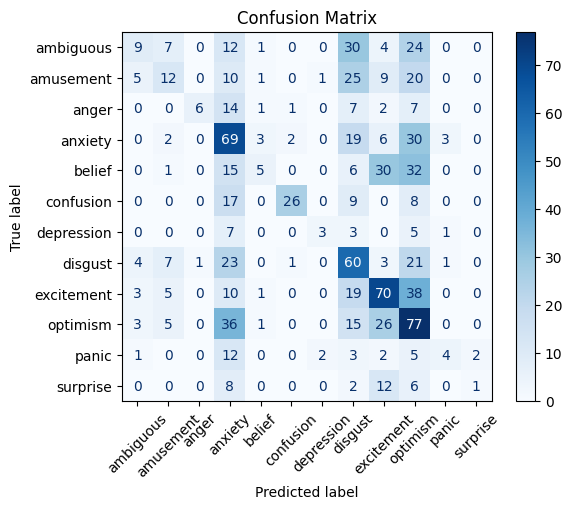

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_test_pred, labels=rf_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_classes)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

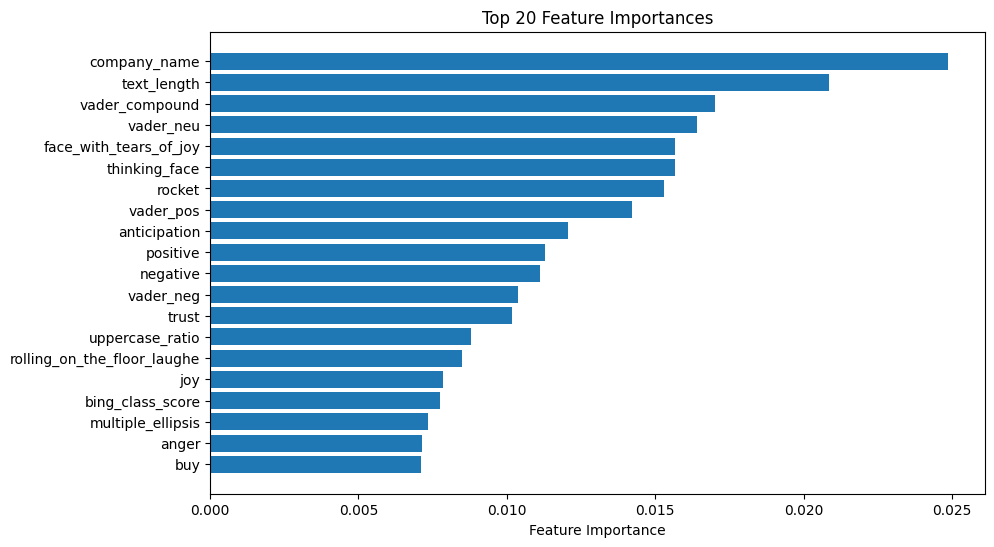

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

if hasattr(best_rf, "feature_importances_"):
    feature_importances = best_rf.feature_importances_
elif hasattr(xgb_clf, "feature_importances_"):
    feature_importances = xgb_clf.feature_importances_
else:
    raise AttributeError("Il modello fornito non supporta il calcolo delle feature importances.")

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
dense_feature_names = [
    "bing_agreement_score", "bing_class_score", "anger", "anticipation",
    "disgust", "fear", "joy", "negative", "positive", "sadness",
    "surprise", "trust", "text_length", "vader_pos",
    "vader_neu", "vader_neg", "vader_compound", "uppercase_ratio"
]
all_feature_names = np.concatenate([tfidf_feature_names, dense_feature_names])

sorted_idx = np.argsort(feature_importances)[::-1]
sorted_features = all_feature_names[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

top_n = 20
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), sorted_importances[:top_n][::-1], align='center')
plt.yticks(range(top_n), sorted_features[:top_n][::-1])
plt.xlabel("Feature Importance")
plt.title("Top 20 Feature Importances")
plt.show()

#### Basic TF-IDF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score
import itertools

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

results = []

for params in itertools.product(*param_grid.values()):
    param_dict = dict(zip(param_grid.keys(), params))

    rf_tfidf = RandomForestClassifier(**param_dict, random_state=42)

    rf_tfidf.fit(X_train_tfidf, y_train)

    y_val_pred = rf_tfidf.predict(X_val_tfidf)
    f1 = f1_score(y_val, y_val_pred, average="macro")

    results.append((param_dict, f1))

results = sorted(results, key=lambda x: x[1], reverse=True)

best_params, best_f1 = results[0]
print("Migliori parametri trovati:", best_params)
print(f"F1 Score sul validation set: {best_f1:.4f}")

Migliori parametri trovati: {'n_estimators': 300, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1}
F1 Score sul validation set: 0.3257


In [ ]:
best_rf_tfidf = RandomForestClassifier(**best_params, random_state=42)
best_rf_tfidf.fit(X_train_tfidf, y_train)

y_test_pred = best_rf_tfidf.predict(X_test_tfidf)
print("Test Set Performance:")
print(classification_report(y_test, y_test_pred))

Test Set Performance:
              precision    recall  f1-score   support

   ambiguous       0.28      0.08      0.12        87
   amusement       0.39      0.19      0.26        83
       anger       0.82      0.24      0.37        38
     anxiety       0.31      0.57      0.40       134
      belief       0.27      0.07      0.11        89
   confusion       0.80      0.47      0.59        60
  depression       0.38      0.16      0.22        19
     disgust       0.32      0.53      0.40       121
  excitement       0.37      0.45      0.41       146
    optimism       0.28      0.38      0.32       163
       panic       0.29      0.06      0.11        31
    surprise       0.29      0.07      0.11        29

    accuracy                           0.34      1000
   macro avg       0.40      0.27      0.28      1000
weighted avg       0.36      0.34      0.32      1000



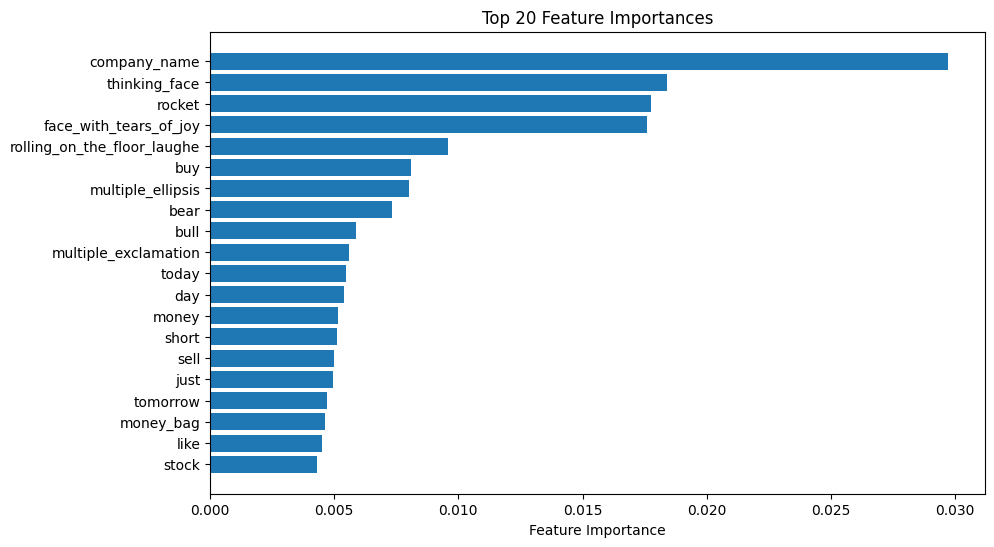

In [ ]:
if hasattr(best_rf_tfidf, "feature_importances_"):
    feature_importances = best_rf_tfidf.feature_importances_
elif hasattr(xgb_clf, "feature_importances_"):
    feature_importances = xgb_clf.feature_importances_
else:
    raise AttributeError("Il modello fornito non supporta il calcolo delle feature importances.")

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
dense_feature_names = [
    "bing_agreement_score", "bing_class_score", "anger", "anticipation",
    "disgust", "fear", "joy", "negative", "positive", "sadness",
    "surprise", "trust", "text_length", "vader_pos",
    "vader_neu", "vader_neg", "vader_compound", "uppercase_ratio"
]
all_feature_names = np.concatenate([tfidf_feature_names, dense_feature_names])

sorted_idx = np.argsort(feature_importances)[::-1]
sorted_features = all_feature_names[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

top_n = 20
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), sorted_importances[:top_n][::-1], align='center')
plt.yticks(range(top_n), sorted_features[:top_n][::-1])
plt.xlabel("Feature Importance")
plt.title("Top 20 Feature Importances")
plt.show()

#### TF-IDF with bigrams

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score
import itertools

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

results = []

for params in itertools.product(*param_grid.values()):
    param_dict = dict(zip(param_grid.keys(), params))

    rf_tfidf = RandomForestClassifier(**param_dict, random_state=42)

    rf_tfidf.fit(X_train_tfidf_n, y_train)

    y_val_pred = rf_tfidf.predict(X_val_tfidf_n)
    f1 = f1_score(y_val, y_val_pred, average="macro")

    results.append((param_dict, f1))

results = sorted(results, key=lambda x: x[1], reverse=True)

best_params, best_f1 = results[0]
print("Migliori parametri trovati:", best_params)
print(f"F1 Score sul validation set: {best_f1:.4f}")

Migliori parametri trovati: {'n_estimators': 200, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1}
F1 Score sul validation set: 0.3203


In [ ]:
best_rf_tfidf_n = RandomForestClassifier(**best_params, random_state=42)
best_rf_tfidf_n.fit(X_train_tfidf_n, y_train)

y_test_pred = best_rf_tfidf_n.predict(X_test_tfidf_n)
print("Test Set Performance:")
print(classification_report(y_test, y_test_pred))

Test Set Performance:
              precision    recall  f1-score   support

   ambiguous       0.25      0.11      0.16        87
   amusement       0.42      0.17      0.24        83
       anger       0.88      0.18      0.30        38
     anxiety       0.32      0.58      0.41       134
      belief       0.38      0.07      0.11        89
   confusion       0.82      0.45      0.58        60
  depression       0.43      0.16      0.23        19
     disgust       0.30      0.54      0.39       121
  excitement       0.43      0.42      0.43       146
    optimism       0.34      0.51      0.41       163
       panic       0.44      0.13      0.20        31
    surprise       0.40      0.07      0.12        29

    accuracy                           0.36      1000
   macro avg       0.45      0.28      0.30      1000
weighted avg       0.40      0.36      0.34      1000



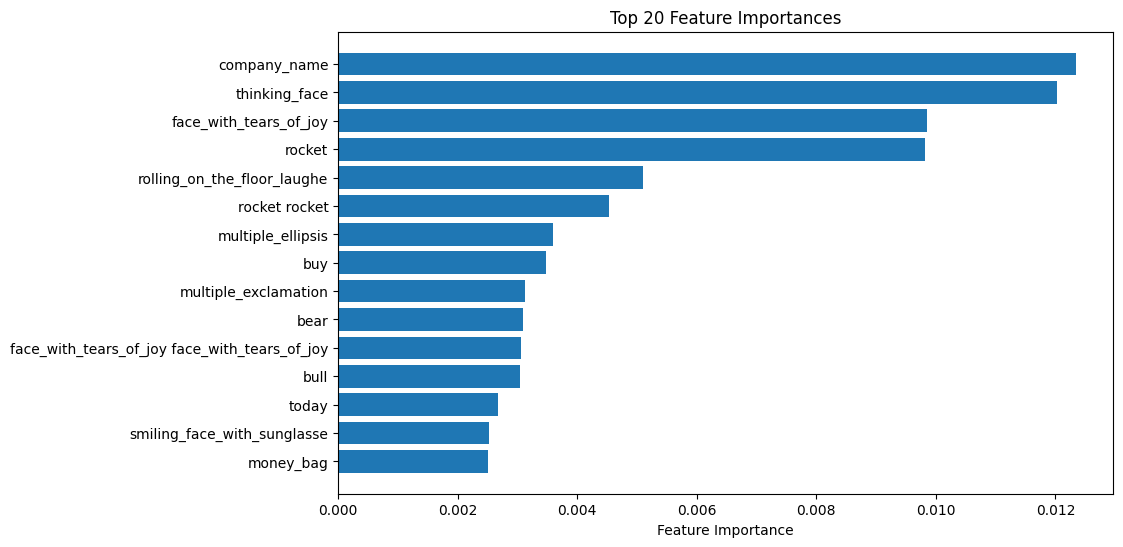

In [ ]:
if hasattr(best_rf_tfidf_n, "feature_importances_"):
    feature_importances = best_rf_tfidf_n.feature_importances_
elif hasattr(xgb_clf, "feature_importances_"):
    feature_importances = xgb_clf.feature_importances_
else:
    raise AttributeError("Il modello fornito non supporta il calcolo delle feature importances.")

tfidf_n_feature_names = tfidf_vectorizer_n.get_feature_names_out()
dense_feature_names = [
    "bing_agreement_score", "bing_class_score", "anger", "anticipation",
    "disgust", "fear", "joy", "negative", "positive", "sadness",
    "surprise", "trust", "text_length", "vader_pos",
    "vader_neu", "vader_neg", "vader_compound", "uppercase_ratio"
]
all_feature_names = np.concatenate([tfidf_n_feature_names, dense_feature_names])

sorted_idx = np.argsort(feature_importances)[::-1]
sorted_features = all_feature_names[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

top_n = 15
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), sorted_importances[:top_n][::-1], align='center')
plt.yticks(range(top_n), sorted_features[:top_n][::-1])
plt.xlabel("Feature Importance")
plt.title("Top 20 Feature Importances")
plt.show()

#### Enriched TF-IDF with bigrams

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score
import itertools

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

results = []

for params in itertools.product(*param_grid.values()):
    param_dict = dict(zip(param_grid.keys(), params))

    rf_tfidf = RandomForestClassifier(**param_dict, random_state=42)

    rf_tfidf.fit(X_train_combined_n, y_train)

    y_val_pred = rf_tfidf.predict(X_val_combined_n)
    f1 = f1_score(y_val, y_val_pred, average="macro")

    results.append((param_dict, f1))

results = sorted(results, key=lambda x: x[1], reverse=True)

best_params, best_f1 = results[0]
print("Migliori parametri trovati:", best_params)
print(f"F1 Score sul validation set: {best_f1:.4f}")

Migliori parametri trovati: {'n_estimators': 300, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1}
F1 Score sul validation set: 0.2942


In [ ]:
best_rf_combined_n = RandomForestClassifier(**best_params, random_state=42)
best_rf_combined_n.fit(X_train_combined_n, y_train)

y_test_pred = best_rf_combined_n.predict(X_test_combined_n)
print("Test Set Performance:")
print(classification_report(y_test, y_test_pred))

Test Set Performance:
              precision    recall  f1-score   support

   ambiguous       0.37      0.13      0.19        87
   amusement       0.33      0.13      0.19        83
       anger       0.83      0.13      0.23        38
     anxiety       0.28      0.51      0.36       134
      belief       0.31      0.04      0.08        89
   confusion       0.82      0.45      0.58        60
  depression       0.60      0.16      0.25        19
     disgust       0.33      0.57      0.42       121
  excitement       0.42      0.41      0.41       146
    optimism       0.29      0.49      0.36       163
       panic       0.40      0.06      0.11        31
    surprise       0.40      0.07      0.12        29

    accuracy                           0.34      1000
   macro avg       0.45      0.26      0.28      1000
weighted avg       0.39      0.34      0.31      1000



#### RoBERTa based embeddings

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score
import itertools

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

results = []

total_combinations = len(list(itertools.product(*param_grid.values())))

for idx, params in enumerate(itertools.product(*param_grid.values())):
    param_dict = dict(zip(param_grid.keys(), params))

    print(f"Testando combinazione {idx + 1}/{total_combinations}: {param_dict}")

    rf = RandomForestClassifier(**param_dict, random_state=42)

    rf.fit(X_roberta_train, y_train)

    y_val_pred = rf.predict(X_roberta_val)
    f1 = f1_score(y_val, y_val_pred, average="macro")

    results.append((param_dict, f1))

results = sorted(results, key=lambda x: x[1], reverse=True)

best_params, best_f1 = results[0]
print("Migliori parametri trovati:", best_params)
print(f"F1 Score sul validation set: {best_f1:.4f}")

best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_roberta_train, y_train)

y_test_pred = best_rf.predict(X_roberta_test)
print("Test Set Performance:")
print(classification_report(y_test, y_test_pred))

Testando combinazione 1/81: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1}
Testando combinazione 2/81: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 2}
Testando combinazione 3/81: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 4}
Testando combinazione 4/81: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 1}
Testando combinazione 5/81: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2}
Testando combinazione 6/81: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 4}
Testando combinazione 7/81: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 1}
Testando combinazione 8/81: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 2}
Testando combinazione 9/81: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split'

#### Enriched RoBERTa Embeddings

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

results = []

total_combinations = len(list(itertools.product(*param_grid.values())))

for idx, params in enumerate(itertools.product(*param_grid.values())):
    param_dict = dict(zip(param_grid.keys(), params))

    print(f"Testando combinazione {idx + 1}/{total_combinations}: {param_dict}")

    rf = RandomForestClassifier(**param_dict, random_state=42)

    rf.fit(X_roberta_combined_train, y_train)

    y_val_pred = rf.predict(X_roberta_combined_val)
    f1 = f1_score(y_val, y_val_pred, average="macro")

    results.append((param_dict, f1))

results = sorted(results, key=lambda x: x[1], reverse=True)

best_params, best_f1 = results[0]
print("Migliori parametri trovati:", best_params)
print(f"F1 Score sul validation set: {best_f1:.4f}")

best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_roberta_combined_train, y_train)

y_test_pred = best_rf.predict(X_roberta_combined_test)
print("Test Set Performance:")
print(classification_report(y_test, y_test_pred))

#### Bertweet based embeddings

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score
import itertools

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

results = []

total_combinations = len(list(itertools.product(*param_grid.values())))

for idx, params in enumerate(itertools.product(*param_grid.values())):
    param_dict = dict(zip(param_grid.keys(), params))

    print(f"Testando combinazione {idx + 1}/{total_combinations}: {param_dict}")

    rf = RandomForestClassifier(**param_dict, random_state=42)

    rf.fit(X_bertweet_train, y_train)

    y_val_pred = rf.predict(X_bertweet_val)
    f1 = f1_score(y_val, y_val_pred, average="macro")

    results.append((param_dict, f1))

results = sorted(results, key=lambda x: x[1], reverse=True)

best_params, best_f1 = results[0]
print("Migliori parametri trovati:", best_params)
print(f"F1 Score sul validation set: {best_f1:.4f}")

best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_bertweet_train, y_train)

y_test_pred = best_rf.predict(X_bertweet_test)
print("Test Set Performance:")
print(classification_report(y_test, y_test_pred))

#### Enriched Bertweet embeddings

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

results = []

total_combinations = len(list(itertools.product(*param_grid.values())))

for idx, params in enumerate(itertools.product(*param_grid.values())):
    param_dict = dict(zip(param_grid.keys(), params))

    print(f"Testando combinazione {idx + 1}/{total_combinations}: {param_dict}")

    rf = RandomForestClassifier(**param_dict, random_state=42)

    rf.fit(X_bertweet_combined_train, y_train)

    y_val_pred = rf.predict(X_bertweet_combined_val)
    f1 = f1_score(y_val, y_val_pred, average="macro")

    results.append((param_dict, f1))

results = sorted(results, key=lambda x: x[1], reverse=True)

best_params, best_f1 = results[0]
print("Migliori parametri trovati:", best_params)
print(f"F1 Score sul validation set: {best_f1:.4f}")

best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_bertweet_combined_train, y_train)

y_test_pred = best_rf.predict(X_bertweet_combined_test)
print("Test Set Performance:")
print(classification_report(y_test, y_test_pred))

### XGBoost

Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import classification_report

label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)


#### Basic TF-IDF

Model training and test

In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train_tfidf_n, label=y_train_encoded)
dval = xgb.DMatrix(X_val_tfidf_n, label=y_val_encoded)

params = {
    "objective": "multi:softmax",
    "num_class": len(set(y_train_encoded)),
    "learning_rate": 0.1,
    "max_depth": 8,
    "eval_metric": "mlogloss",
    "seed": 42
}

evals = [(dtrain, "train"), (dval, "eval")]
model = xgb.train(
    params,
    dtrain,
    num_boost_round=500,
    evals=evals,
    early_stopping_rounds=10,
    verbose_eval=True
)

dtest = xgb.DMatrix(X_test_tfidf_n)
y_test_pred_encoded = model.predict(dtest)

y_test_pred = label_encoder.inverse_transform(y_test_pred_encoded.astype(int))

print("Test Set Performance:")
print(classification_report(y_test, y_test_pred))

[0]	train-mlogloss:2.39432	eval-mlogloss:2.41220
[1]	train-mlogloss:2.32153	eval-mlogloss:2.35416
[2]	train-mlogloss:2.25928	eval-mlogloss:2.30652
[3]	train-mlogloss:2.20615	eval-mlogloss:2.26814
[4]	train-mlogloss:2.15806	eval-mlogloss:2.23371
[5]	train-mlogloss:2.11564	eval-mlogloss:2.20489
[6]	train-mlogloss:2.07785	eval-mlogloss:2.17794
[7]	train-mlogloss:2.04293	eval-mlogloss:2.15450
[8]	train-mlogloss:2.01068	eval-mlogloss:2.13407
[9]	train-mlogloss:1.98099	eval-mlogloss:2.11503
[10]	train-mlogloss:1.95366	eval-mlogloss:2.09965
[11]	train-mlogloss:1.92870	eval-mlogloss:2.08396
[12]	train-mlogloss:1.90464	eval-mlogloss:2.07103
[13]	train-mlogloss:1.88258	eval-mlogloss:2.05850
[14]	train-mlogloss:1.86088	eval-mlogloss:2.04919
[15]	train-mlogloss:1.84127	eval-mlogloss:2.03940
[16]	train-mlogloss:1.82239	eval-mlogloss:2.03023
[17]	train-mlogloss:1.80564	eval-mlogloss:2.02226
[18]	train-mlogloss:1.78876	eval-mlogloss:2.01531
[19]	train-mlogloss:1.77299	eval-mlogloss:2.00938
[20]	train

In [ ]:
importance = model.get_score(importance_type="gain")
print(importance)

{'f0': 1.9827810525894165, 'f51': 1.8355212211608887, 'f75': 2.310164451599121, 'f159': 1.6764198541641235, 'f261': 2.282729148864746, 'f443': 2.361232042312622, 'f464': 2.698791742324829, 'f556': 3.908487558364868, 'f573': 0.12291610240936279, 'f608': 2.211402177810669, 'f652': 2.3360047340393066, 'f688': 2.105299949645996, 'f750': 1.8210177421569824, 'f768': 1.4798083305358887, 'f881': 2.0598790645599365, 'f965': 0.9410324096679688, 'f1007': 1.5484020709991455, 'f1044': 1.695849895477295, 'f1128': 1.9679393768310547, 'f1212': 2.397707462310791, 'f1234': 2.0897364616394043, 'f1339': 1.6991747617721558, 'f1480': 2.4290318489074707, 'f1527': 3.0036802291870117, 'f1555': 2.8134419918060303, 'f1567': 1.7303632497787476, 'f1623': 2.0730953216552734, 'f1709': 2.020925283432007, 'f1782': 3.3810415267944336, 'f1829': 2.2132301330566406, 'f1896': 2.0485525131225586, 'f1921': 4.176828861236572, 'f2002': 3.1436750888824463, 'f2085': 2.793519973754883, 'f2193': 3.164555788040161, 'f2315': 2.53557

#### TF-IDF with bigrams

Model training and test

In [ ]:
from sklearn.metrics import f1_score

dtrain = xgb.DMatrix(X_train_tfidf_n, label=y_train_encoded)
dval = xgb.DMatrix(X_val_tfidf_n, label=y_val_encoded)

learning_rates = [0.01, 0.05, 0.1]
max_depths = [4, 6, 8]

best_f1 = 0
best_params = None

print("Inizio dell'ottimizzazione dei parametri...")
for learning_rate in learning_rates:
    for max_depth in max_depths:

        params = {
            "objective": "multi:softmax",
            "num_class": len(set(y_train_encoded)),
            "learning_rate": learning_rate,
            "max_depth": max_depth,
            "eval_metric": "mlogloss",
            "seed": 42
        }

        evals = [(dtrain, "train"), (dval, "eval")]
        model = xgb.train(
            params,
            dtrain,
            num_boost_round=500,
            evals=evals,
            early_stopping_rounds=10,
            verbose_eval=False
        )

        y_val_pred_encoded = model.predict(dval)
        y_val_pred = label_encoder.inverse_transform(y_val_pred_encoded.astype(int))

        f1 = f1_score(y_val, y_val_pred, average="macro")
        print(f"learning_rate: {learning_rate}, max_depth: {max_depth}, F1 Macro: {f1:.4f}")

        if f1 > best_f1:
            best_f1 = f1
            best_params = {"learning_rate": learning_rate, "max_depth": max_depth}


print(f"Migliori parametri trovati: {best_params}, con F1 Macro: {best_f1:.4f}")


final_params = {
    "objective": "multi:softmax",
    "num_class": len(set(y_train_encoded)),
    "learning_rate": best_params["learning_rate"],
    "max_depth": best_params["max_depth"],
    "eval_metric": "mlogloss",
    "seed": 42
}
model = xgb.train(
    final_params,
    dtrain,
    num_boost_round=500,
    evals=evals,
    early_stopping_rounds=10,
    verbose_eval=True
)

dtest = xgb.DMatrix(X_test_tfidf_n)
y_test_pred_encoded = model.predict(dtest)
y_test_pred = label_encoder.inverse_transform(y_test_pred_encoded.astype(int))

print("Test Set Performance:")
print(classification_report(y_test, y_test_pred))

Inizio dell'ottimizzazione dei parametri...
learning_rate: 0.01, max_depth: 4, F1 Macro: 0.3134
learning_rate: 0.01, max_depth: 6, F1 Macro: 0.3256
learning_rate: 0.01, max_depth: 8, F1 Macro: 0.3290
learning_rate: 0.05, max_depth: 4, F1 Macro: 0.3333
learning_rate: 0.05, max_depth: 6, F1 Macro: 0.3384
learning_rate: 0.05, max_depth: 8, F1 Macro: 0.3289
learning_rate: 0.1, max_depth: 4, F1 Macro: 0.3372
learning_rate: 0.1, max_depth: 6, F1 Macro: 0.3353
learning_rate: 0.1, max_depth: 8, F1 Macro: 0.3444
Migliori parametri trovati: {'learning_rate': 0.1, 'max_depth': 8}, con F1 Macro: 0.3444
[0]	train-mlogloss:2.39432	eval-mlogloss:2.41220
[1]	train-mlogloss:2.32153	eval-mlogloss:2.35416
[2]	train-mlogloss:2.25928	eval-mlogloss:2.30652
[3]	train-mlogloss:2.20615	eval-mlogloss:2.26814
[4]	train-mlogloss:2.15806	eval-mlogloss:2.23371
[5]	train-mlogloss:2.11564	eval-mlogloss:2.20489
[6]	train-mlogloss:2.07785	eval-mlogloss:2.17794
[7]	train-mlogloss:2.04293	eval-mlogloss:2.15450
[8]	train-

Distil-RoBERTa based embeddings

In [ ]:
dtrain = xgb.DMatrix(X_roberta_train, label=y_train_encoded)
dval = xgb.DMatrix(X_roberta_val, label=y_val_encoded)

learning_rates = [0.01, 0.05, 0.1]
max_depths = [4, 6, 8]

best_f1 = 0
best_params = None

print("Inizio dell'ottimizzazione dei parametri...")
for learning_rate in learning_rates:
    for max_depth in max_depths:

        params = {
            "objective": "multi:softmax",
            "num_class": len(set(y_train_encoded)),
            "learning_rate": learning_rate,
            "max_depth": max_depth,
            "eval_metric": "mlogloss",
            "seed": 42
        }

        evals = [(dtrain, "train"), (dval, "eval")]
        model = xgb.train(
            params,
            dtrain,
            num_boost_round=500,
            evals=evals,
            early_stopping_rounds=10,
            verbose_eval=False
        )

        y_val_pred_encoded = model.predict(dval)
        y_val_pred = label_encoder.inverse_transform(y_val_pred_encoded.astype(int))

        f1 = f1_score(y_val, y_val_pred, average="macro")
        print(f"learning_rate: {learning_rate}, max_depth: {max_depth}, F1 Macro: {f1:.4f}")

        if f1 > best_f1:
            best_f1 = f1
            best_params = {"learning_rate": learning_rate, "max_depth": max_depth}

print(f"Migliori parametri trovati: {best_params}, con F1 Macro: {best_f1:.4f}")

final_params = {
    "objective": "multi:softmax",
    "num_class": len(set(y_train_encoded)),
    "learning_rate": best_params["learning_rate"],
    "max_depth": best_params["max_depth"],
    "eval_metric": "mlogloss",
    "seed": 42
}
model = xgb.train(
    final_params,
    dtrain,
    num_boost_round=500,
    evals=evals,
    early_stopping_rounds=10,
    verbose_eval=True
)

dtest = xgb.DMatrix(X_roberta_test)
y_test_pred_encoded = model.predict(dtest)
y_test_pred = label_encoder.inverse_transform(y_test_pred_encoded.astype(int))

print("Test Set Performance:")
print(classification_report(y_test, y_test_pred))

Inizio dell'ottimizzazione dei parametri...
learning_rate: 0.01, max_depth: 4, F1 Macro: 0.2091
learning_rate: 0.01, max_depth: 6, F1 Macro: 0.2180
learning_rate: 0.01, max_depth: 8, F1 Macro: 0.2082
learning_rate: 0.05, max_depth: 4, F1 Macro: 0.2146
learning_rate: 0.05, max_depth: 6, F1 Macro: 0.2166
learning_rate: 0.05, max_depth: 8, F1 Macro: 0.2109
learning_rate: 0.1, max_depth: 4, F1 Macro: 0.2318
learning_rate: 0.1, max_depth: 6, F1 Macro: 0.2158
learning_rate: 0.1, max_depth: 8, F1 Macro: 0.1980
Migliori parametri trovati: {'learning_rate': 0.1, 'max_depth': 4}, con F1 Macro: 0.2318
[0]	train-mlogloss:2.42469	eval-mlogloss:2.44981
[1]	train-mlogloss:2.37179	eval-mlogloss:2.41659
[2]	train-mlogloss:2.32240	eval-mlogloss:2.38903
[3]	train-mlogloss:2.27763	eval-mlogloss:2.36464
[4]	train-mlogloss:2.23682	eval-mlogloss:2.34196
[5]	train-mlogloss:2.19803	eval-mlogloss:2.31857
[6]	train-mlogloss:2.16236	eval-mlogloss:2.30153
[7]	train-mlogloss:2.12824	eval-mlogloss:2.28600
[8]	train-

### SVM

Bigram TF-IDF

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, f1_score

param_grid = [0.01, 0.1, 1, 10, 100]

best_f1 = 0
best_c = None
results = []

print("Ottimizzazione di C in corso...")
for C in param_grid:

    svm_model = SVC(kernel='linear', C=C, random_state=42)

    svm_model.fit(X_train_tfidf_n, y_train)

    y_val_pred = svm_model.predict(X_val_tfidf_n)
    f1 = f1_score(y_val, y_val_pred, average="macro")

    results.append((C, f1))

    if f1 > best_f1:
        best_f1 = f1
        best_c = C

print(f"Miglior valore di C: {best_c}")
print(f"F1 score sul validation set: {best_f1:.4f}")

best_svm = SVC(kernel='linear', C=best_c, random_state=42)
best_svm.fit(X_train_tfidf_n, y_train)
y_test_pred = best_svm.predict(X_test_tfidf_n)

print("Test Set Performance (SVM):")
print(classification_report(y_test, y_test_pred))

Ottimizzazione di C in corso...
Miglior valore di C: 1
F1 score sul validation set: 0.3415
Test Set Performance (SVM):
              precision    recall  f1-score   support

   ambiguous       0.15      0.07      0.09        87
   amusement       0.34      0.22      0.26        83
       anger       0.71      0.13      0.22        38
     anxiety       0.34      0.54      0.42       134
      belief       0.21      0.10      0.14        89
   confusion       0.79      0.45      0.57        60
  depression       0.33      0.11      0.16        19
     disgust       0.34      0.52      0.41       121
  excitement       0.36      0.40      0.38       146
    optimism       0.32      0.47      0.38       163
       panic       0.56      0.16      0.25        31
    surprise       0.50      0.10      0.17        29

    accuracy                           0.35      1000
   macro avg       0.41      0.27      0.29      1000
weighted avg       0.36      0.35      0.33      1000



Distil-RoBERTa based embeddings

In [ ]:
from sklearn.svm import SVC

param_grid = [0.01, 0.1, 1, 10, 100]

best_f1 = 0
best_c = None
results = []

print("Ottimizzazione di C in corso...")
for C in param_grid:

    svm_model = SVC(kernel='linear', C=C, random_state=42)

    svm_model.fit(X_roberta_train, y_train)

    y_val_pred = svm_model.predict(X_roberta_val)
    f1 = f1_score(y_val, y_val_pred, average="macro")

    results.append((C, f1))

    if f1 > best_f1:
        best_f1 = f1
        best_c = C

print(f"Miglior valore di C: {best_c}")
print(f"F1 score sul validation set: {best_f1:.4f}")

best_svm = SVC(kernel='linear', C=best_c, random_state=42)
best_svm.fit(X_roberta_train, y_train)
y_test_pred = best_svm.predict(X_roberta_test)

print("Test Set Performance (SVM):")
print(classification_report(y_test, y_test_pred))

Ottimizzazione di C in corso...
Miglior valore di C: 0.1
F1 score sul validation set: 0.2730
Test Set Performance (SVM):
              precision    recall  f1-score   support

   ambiguous       0.16      0.15      0.16        87
   amusement       0.25      0.20      0.22        83
       anger       0.23      0.16      0.19        38
     anxiety       0.31      0.40      0.35       134
      belief       0.25      0.21      0.23        89
   confusion       0.41      0.32      0.36        60
  depression       0.12      0.05      0.07        19
     disgust       0.31      0.40      0.35       121
  excitement       0.37      0.43      0.40       146
    optimism       0.34      0.36      0.35       163
       panic       0.38      0.10      0.15        31
    surprise       0.35      0.21      0.26        29

    accuracy                           0.31      1000
   macro avg       0.29      0.25      0.26      1000
weighted avg       0.30      0.31      0.30      1000



#### DistilRoBERTA fine-tuned

This model was trained on Colab due to computational limitations.
The results are in the Colab notebook named BERT_embeddings_and_classifier.ipynb.